In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
train = pd.read_csv(r"C:\Users\dixit\Desktop\Credit Card Lead Prediction\train_s3TEQDk.csv")
test = pd.read_csv(r"C:\Users\dixit\Desktop\Credit Card Lead Prediction\test_mSzZ8RL.csv")

In [3]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


# EDA

In [5]:
train.Is_Lead.value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

<AxesSubplot:xlabel='Gender'>

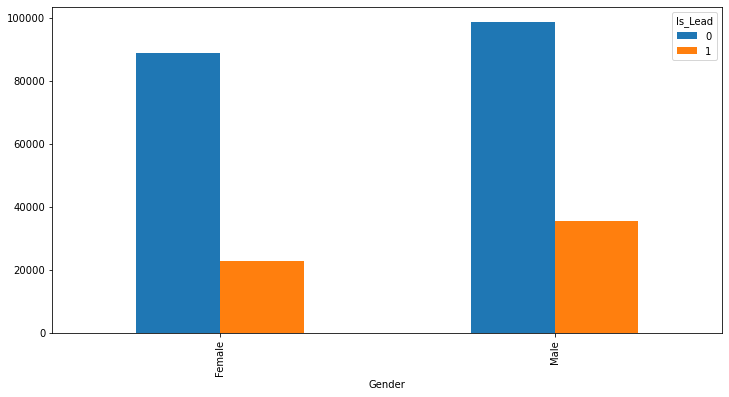

In [6]:
train.groupby(['Gender', 'Is_Lead']).size().unstack().plot(kind='bar', figsize=(12,6))

<AxesSubplot:xlabel='Occupation'>

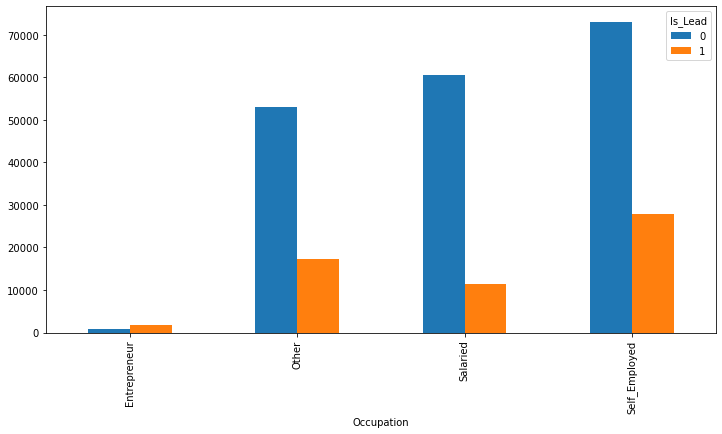

In [7]:
train.groupby(['Occupation', 'Is_Lead']).size().unstack().plot(kind='bar', figsize=(12,6))

<AxesSubplot:xlabel='Channel_Code'>

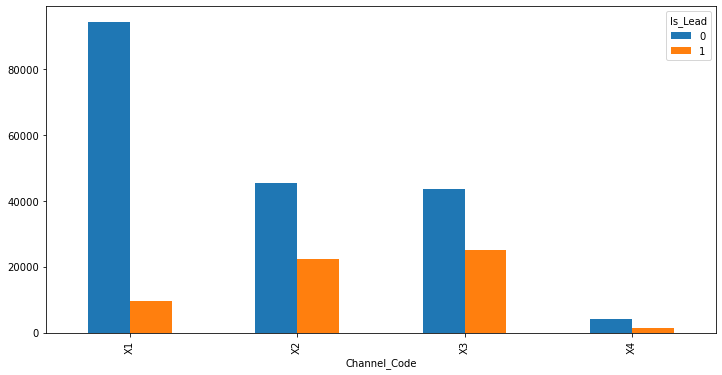

In [8]:
train.groupby(['Channel_Code', 'Is_Lead']).size().unstack().plot(kind='bar', figsize=(12,6))

<AxesSubplot:xlabel='Vintage'>

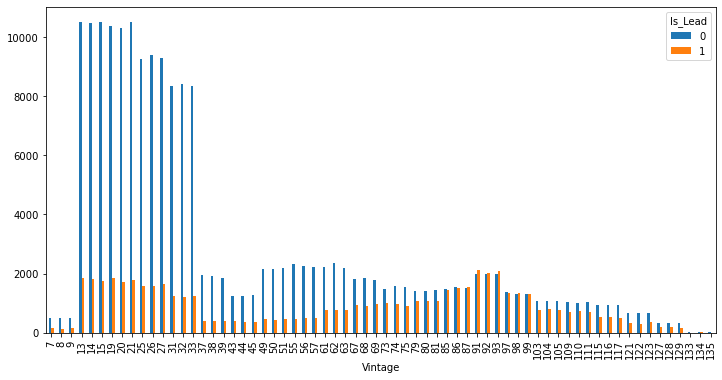

In [9]:
train.groupby(['Vintage', 'Is_Lead']).size().unstack().plot(kind='bar', figsize=(12,6))

<AxesSubplot:xlabel='Credit_Product'>

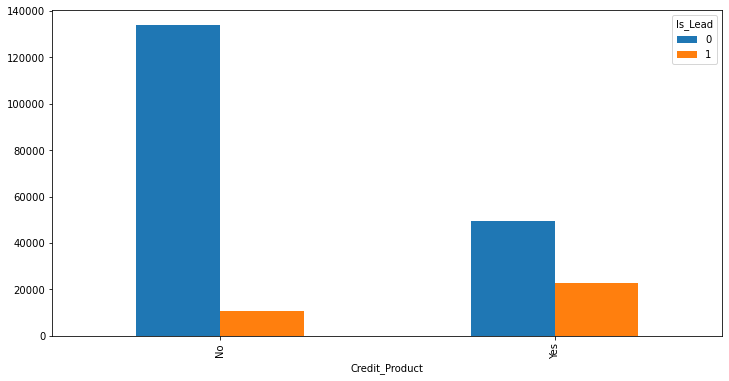

In [10]:
train.groupby(['Credit_Product', 'Is_Lead']).size().unstack().plot(kind='bar', figsize=(12,6))

<AxesSubplot:xlabel='Is_Active'>

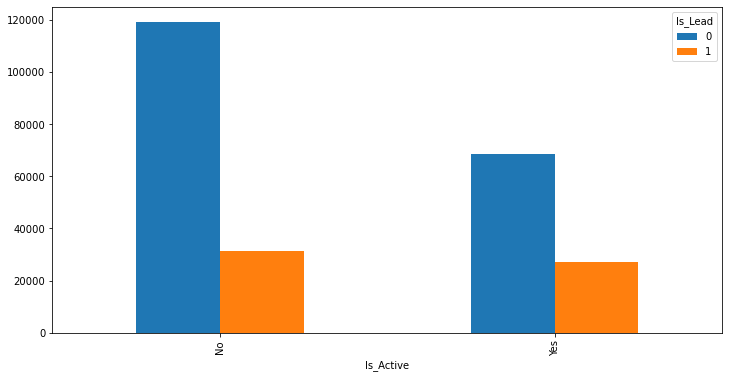

In [11]:
train.groupby(['Is_Active', 'Is_Lead']).size().unstack().plot(kind='bar', figsize=(12,6))

In [12]:
train_data=train
test_data = test

# Removing irrevelant coloumn

In [13]:
train = train.drop(columns = ['ID','Region_Code'], axis = 0)
test = test.drop(columns = ['ID','Region_Code'],axis = 0)

# Creating a dummy variable

In [14]:
train = pd.get_dummies(train, columns = ['Gender','Occupation','Credit_Product','Channel_Code','Is_Active'],prefix = '',prefix_sep = '')
test = pd.get_dummies(test, columns = ['Gender','Occupation','Credit_Product','Channel_Code','Is_Active'],prefix = '',prefix_sep = '')

In [15]:
train.head()

,Age,Vintage,Avg_Account_Balance,Is_Lead,Female,Male,Entrepreneur,Other,Salaried,Self_Employed,No,Yes,X1,X2,X3,X4,No,Yes
0,73,43,1045696,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
1,30,32,581988,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
2,56,26,1484315,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1
3,34,19,470454,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0
4,30,33,886787,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0


In [16]:
test.head()

,Age,Vintage,Avg_Account_Balance,Female,Male,Entrepreneur,Other,Salaried,Self_Employed,No,Yes,X1,X2,X3,X4,No,Yes
0,29,25,742366,0,1,0,1,0,0,0,1,1,0,0,0,1,0
1,43,49,925537,0,1,0,1,0,0,0,0,0,1,0,0,1,0
2,31,14,215949,0,1,0,0,1,0,1,0,1,0,0,0,1,0
3,29,33,868070,0,1,0,1,0,0,1,0,1,0,0,0,1,0
4,29,19,657087,1,0,0,1,0,0,1,0,1,0,0,0,1,0


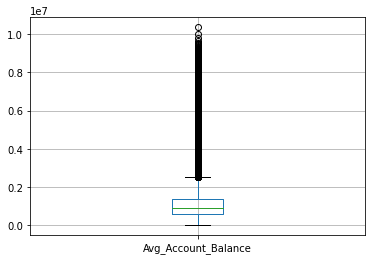

In [10]:
train.boxplot(column = ['Avg_Account_Balance'])
plt.show()

In [12]:
def remove_outliers(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return upper_range,lower_range

In [13]:
upper_bound,lower_bound = remove_outliers(train['Avg_Account_Balance'])
train['Avg_Account_Balance'] = np.where(train['Avg_Account_Balance']>=upper_bound,upper_bound,train['Avg_Account_Balance'])
train['Avg_Account_Balance'] = np.where(train['Avg_Account_Balance']<=lower_bound,lower_bound,train['Avg_Account_Balance'])

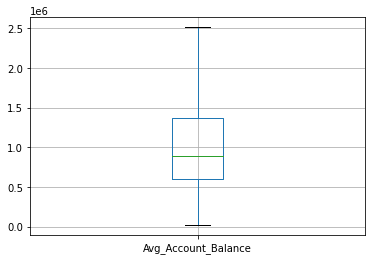

In [14]:
train.boxplot(column = ['Avg_Account_Balance'])
plt.show()

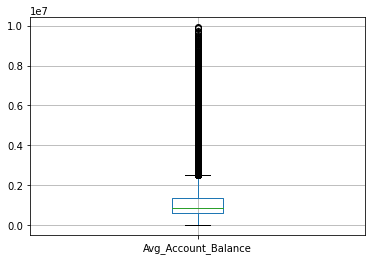

In [17]:
test.boxplot(column = ['Avg_Account_Balance'])
plt.show()

In [18]:
upper_bound,lower_bound = remove_outliers(test['Avg_Account_Balance'])
test['Avg_Account_Balance'] = np.where(test['Avg_Account_Balance']>=upper_bound,upper_bound,test['Avg_Account_Balance'])
test['Avg_Account_Balance'] = np.where(test['Avg_Account_Balance']<=lower_bound,lower_bound,test['Avg_Account_Balance'])

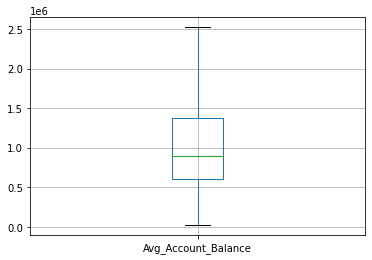

In [19]:
test.boxplot(column = ['Avg_Account_Balance'])
plt.show()

# Droping a target variable from train data

In [17]:
X = train.drop(labels=['Is_Lead'], axis=1)
y = train['Is_Lead'].values

# Data pre processing using standard scaler

In [18]:
from sklearn import preprocessing
ss = preprocessing.StandardScaler()

In [19]:
X = ss.fit_transform(X)
test = ss.transform(test)

# Spliting data into train and cross validate

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.10, random_state=101)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
from sklearn.metrics import roc_auc_score

# Model Training

# LGMRegressor

In [25]:
from lightgbm import LGBMRegressor

In [26]:
lgbm = LGBMRegressor(boosting_type='gbdt', num_leaves=100, max_depth=31, learning_rate=0.01, n_estimators=1000, min_child_samples=20, subsample=0.80)

In [27]:
lgbm.fit(X_train, y_train, verbose=0)

LGBMRegressor(learning_rate=0.01, max_depth=31, n_estimators=1000,
              num_leaves=100, subsample=0.8)

In [28]:
y_pred_lgbm = lgbm.predict(X_cv)
print("roc_auc_score: ", roc_auc_score(y_cv, y_pred_lgbm))

roc_auc_score:  0.8737108100822846


In [29]:
y_pred_lgbm1 = lgbm.predict(test)

In [30]:
y_pred_lgbm1

array([0.04543923, 0.85667727, 0.05882968, ..., 0.06079083, 0.21248466,
       0.0532192 ])

In [31]:
submission = pd.DataFrame({
        "ID": test_data['ID'],
        "Is_Lead": y_pred_lgbm1
    })
submission.to_csv('submit2.csv', index=False)
print(submission)

              ID   Is_Lead
0       VBENBARO  0.045439
1       CCMEWNKY  0.856677
2       VK3KGA9M  0.058830
3       TT8RPZVC  0.024958
4       SHQZEYTZ  0.025866
...          ...       ...
105307  DBENJOYI  0.980880
105308  CWQ72DWS  0.567166
105309  HDESC8GU  0.060791
105310  2PW4SFCA  0.212485
105311  F2NOYPPZ  0.053219

[105312 rows x 2 columns]
